In [ ]:
#part 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#part 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Latian Python/kak sam pertemuan 5/house-data.csv')
df.head() #utk bagian teratas table

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail() #untuk bagian terbawah tabel

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.columns #untuk tahu isi kolom yang ga kebaca (krn kebanyakan)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.shape #untuk tahu ukuran keseluruhan baris & kolom

(21613, 22)

In [ ]:
df.info() #untuk tahu info data (data type, jumlah data apakah ada yang kurang atau tidak, nama kolom, dll)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

INSIGHT :

-Bedrooms dan bathrooms ada missing value

-Date bentuk nya masih string (tapi ga dibutuhin)

In [ ]:
df.describe() #memberikan numerical descriptive statistics

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
##data non numerical ga akan masuk (date dalam kasus ini)

In [ ]:
df.isnull().sum() #mengetahui lebih detail data yang kurang

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
df['bedrooms'].isnull().sum()

13

In [ ]:
df['bedrooms'].mean()

3.37287037037037

In [ ]:
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)    #parameter (1, 2, 3)


In [ ]:
df['bedrooms'].isnull().sum() #udah gaada data bedrooms yang kosong

0

In [ ]:
rata20 = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, rata20, inplace=True)
df['bathrooms'].isnull().sum()

0

In [ ]:
df['floors'].value_counts().to_frame() #to frame supaya munculnya frame

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


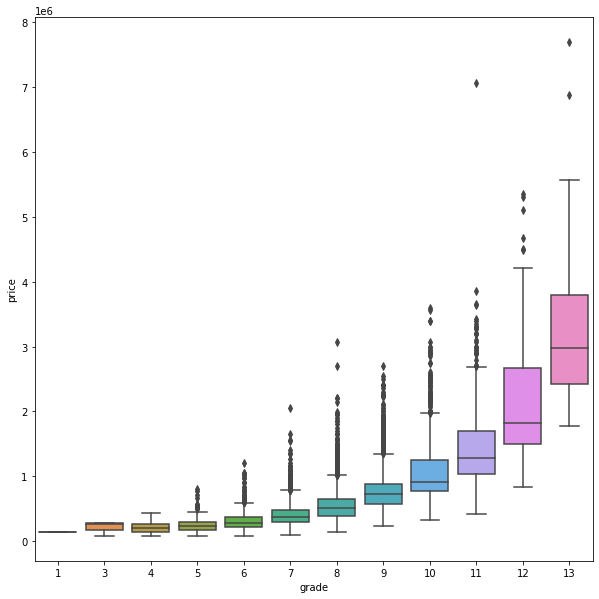

In [ ]:
# SEABORN ->> VISUALIZATION

# Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x='grade', y='price', data=df)

Semakin tinggi grade maka semakin tinggi harganya

In [ ]:
#sns.regplot
#sns.relplot

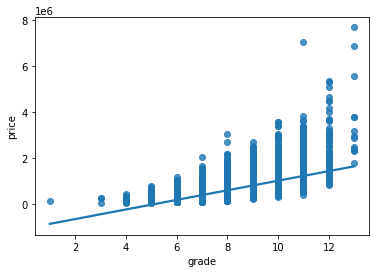

In [ ]:
sns.regplot(x='grade', y='price', data = df)

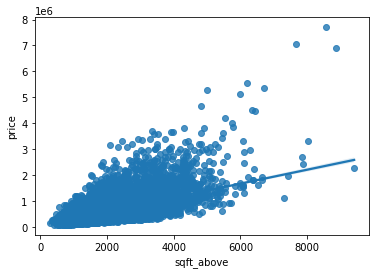

In [ ]:
sns.regplot(x='sqft_above', y='price', data=df)

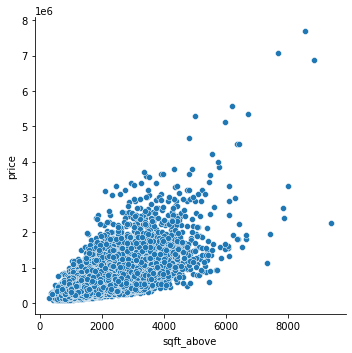

In [ ]:
sns.relplot(x='sqft_above', y='price', data=df) #ga ada garis regresi

In [ ]:
df.corr()['price'] #korelasi antar semua kolom dengan si price, kalo mau semua korelasi, hapus price!

Unnamed: 0       0.027372
id              -0.016762
price            1.000000
bedrooms         0.308890
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

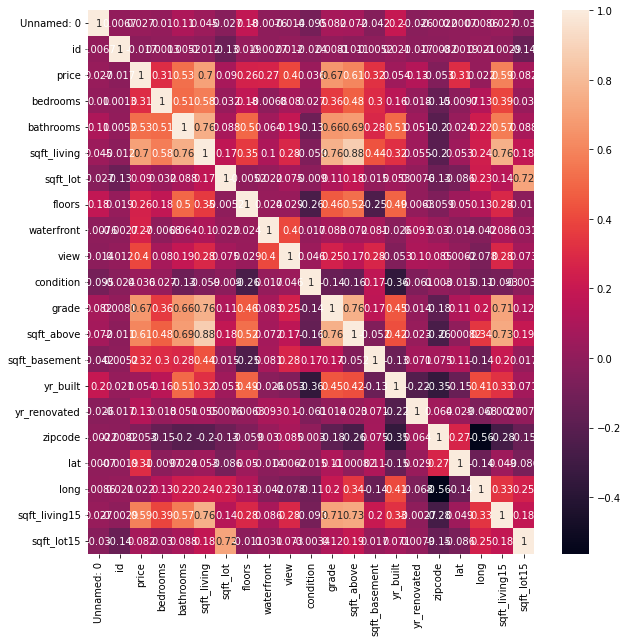

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, )

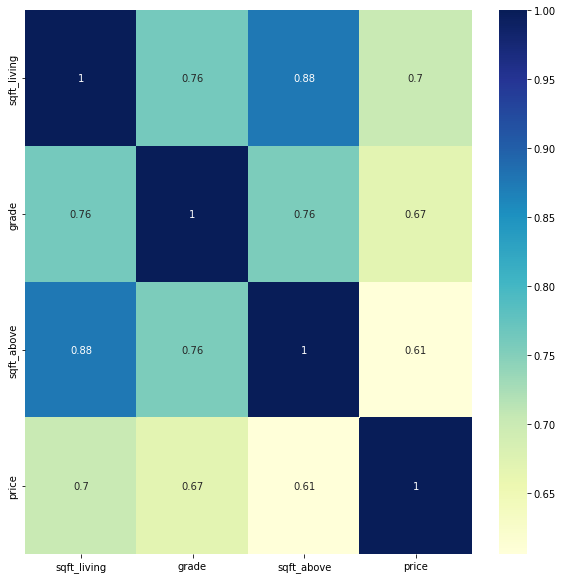

In [ ]:
df_filter = df[['sqft_living', 'grade', 'sqft_above', 'price']]

plt.figure(figsize=(10, 10))
sns.heatmap(df_filter.corr(), annot=True, cmap='YlGnBu')

## Part 2

In [ ]:
#SLR
x = df[['long']] #independent variable
y = df['price'] #dependent variable
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.00046769430149007363

In [ ]:
x = df[['sqft_living']] #independent variable
y = df['price'] #dependent variable
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.4928532179037931

ternyata nilai R^2 dari sqft living belum mencapai 50%, walaupun nilai correlation sudah 70%

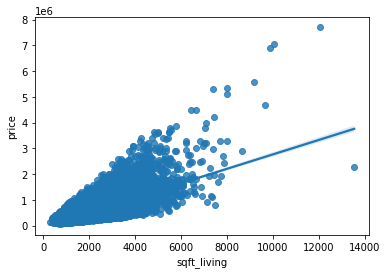

In [ ]:
sns.regplot(x='sqft_living', y='price', data=df)

In [ ]:
#MLR
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [ ]:
X2 = df[features] #independent variable
Y2 = df['price'] #dependent variable
lm2 = LinearRegression()
lm2.fit(X2,Y2)
lm2.score(X2,Y2)

ValueError: ignored

didapat skor R^2 yang lebih tinggi, namun kurang tinggi untuk dibilang 'bagus'

##Mengerjakan MLR dengan standarisasi terlebih dahulu

In [ ]:
#meng standarisasi features dengan Pipeline ini

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


In [ ]:
X3 = df[features] #independent variable
Y3 = df['price'] #dependent variable
pipe = Pipeline(Input)
pipe.fit(X3, Y3)
pipe.score(X3, Y3)

#syntax linear regression dihapus, karena udah include dalam pipeline

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

X4 = df[features]
Y4 = df.price

x_train, x_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.15, random_state=1)
#train_test_split() merupakan library dari sklearn


In [ ]:
x_train.shape
#buat cek apakah data sudah ter-split

In [ ]:
x_test.shape

In [ ]:
X4.shape
#ternyata sudah tersplit

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r1 = Ridge(alpha=0.1)
r1.fit(x_train, y_train)
r1.score(x_test, y_test)


In [ ]:
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

rr = Ridge(alpha=0.1)
rr.fit(x_train_pr, y_train)
rr.score(x_test, y_test)